**Note**: This week, instead of submitting your homework in `.py` files or `.md` files, please show all your work right here in this handy dandy notebook!

We will grade this by clicking "Restart and Run all," and all of the cells in this notebook should produce the output to show your answers on each problem.

### Problem 0:

The Fictional Bureau of Public Health tests the water in various locations around MagicLand for a toxic substance called Mercuronium. 

Mercuronium starts to cause symptoms, like lightheadedness, at around 495 parts per million. At a higher concentration (like 500 parts per million), the symptoms progress to headaches. At 505 parts per million, the symptoms become more severe and possibly permanent. So the government recommends that all water sources be kept under 490 parts per million of Mercuronium and sends toxicologists out to various locations to test the water. It is known that the tests are not perfect, so to avoid uncertainty, the toxicologists are sent on a pretty regular basis to take multiple measurements. 

Import the data from `toxicology_data.csv`, which contains the toxicologists' findings. Please include your pandas code in the cell below to show your work:

In [ ]:
import sys
!{sys.executable} -m pip install pandas

import pandas as pd

# YOUR CODE HERE
df = pd.read_csv('toxicology_data.csv')
df.head



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Problem 1:

Find the number of readings taken for each location in the data, as well as the mean and standard deviation of the readings for each location.

In [ ]:
# YOUR CODE HERE
location_stats = df.groupby('Location')['Reading (Parts per Million)'].agg(['count', 'mean', 'std']).reset_index()
print(location_stats)


                    Location  count        mean        std
0         Chamber of Secrets      7  405.361168  54.248432
1         Forbidden Forest A    200  501.380437  24.942126
2         Forbidden Forest B    200  428.418984  59.243695
3  Hogwarts School Grounds A    100  455.172121  57.819681
4              Nocturn Alley     34  501.937334  21.032674
5         The Leaky Cauldron    100  483.867230  37.293226


### Problem 2:

Remember—the fewer measurements we have for a place, the more uncertainty we have that the aggregate metrics for our measurements accurately represent the _real_ numbers. Calculate the top and bottom of the confidence interval for the average reading in each location, and add it to your location data in columns called `reading_bottom_conf_inv` and `reading_top_conf_inv`. You can use the confidence interval function defined below.

In [ ]:
import sys
!{sys.executable} -m pip install scipy

import math
from scipy.stats import t
import numpy as np

def confidence_interval_for_collection(sample_size=[], standard_deviation=[], mean=[], confidence=0.95):
    degrees_freedom = [count - 1 for count in sample_size]
    outlier_tails = (1.0 - confidence) / 2.0
    confidence_collection = [outlier_tails for _ in sample_size]
    t_distribution_number = [-1 * t.ppf(tails, df) for tails, df in zip(confidence_collection, degrees_freedom)]

    step_1 = [std/math.sqrt(count) for std, count in zip(standard_deviation, sample_size)]
    step_2 = [step * t for step, t in zip(step_1, t_distribution_number)]

    low_end = [mean_num - step_num for mean_num, step_num in zip(mean, step_2)]
    high_end = [mean_num + step_num for mean_num, step_num in zip(mean, step_2)]

    return low_end, high_end


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# YOUR CODE HERE
import math
from scipy.stats import t

# Define the confidence_interval_for_collection function
def confidence_interval_for_collection(sample_size, standard_deviation, mean, confidence=0.95):
    degrees_freedom = [count - 1 for count in sample_size]
    outlier_tails = (1.0 - confidence) / 2.0
    confidence_collection = [outlier_tails for _ in sample_size]
    t_distribution_number = [-1 * t.ppf(tails, df) for tails, df in zip(confidence_collection, degrees_freedom)]
    step_1 = [std / math.sqrt(count) for std, count in zip(standard_deviation, sample_size)]
    step_2 = [step * t_val for step, t_val in zip(step_1, t_distribution_number)]
    low_end = [m - step_val for m, step_val in zip(mean, step_2)]
    high_end = [m + step_val for m, step_val in zip(mean, step_2)]
    return low_end, high_end

# Prepare lists of sample size, std, and mean
sample_size = location_stats['count'].tolist()
standard_deviation = location_stats['std'].tolist()
means = location_stats['mean'].tolist()

# Calculate confidence intervals
low_end, high_end = confidence_interval_for_collection(sample_size, standard_deviation, means)

# Add confidence interval columns to dataframe
location_stats['reading_bottom_conf_inv'] = low_end
location_stats['reading_top_conf_inv'] = high_end
print(location_stats)


                    Location  count        mean        std  \
0         Chamber of Secrets      7  405.361168  54.248432   
1         Forbidden Forest A    200  501.380437  24.942126   
2         Forbidden Forest B    200  428.418984  59.243695   
3  Hogwarts School Grounds A    100  455.172121  57.819681   
4              Nocturn Alley     34  501.937334  21.032674   
5         The Leaky Cauldron    100  483.867230  37.293226   

   reading_bottom_conf_inv  reading_top_conf_inv  
0               355.189736            455.532600  
1               497.902547            504.858327  
2               420.158139            436.679829  
3               443.699442            466.644800  
4               494.598687            509.275981  
5               476.467445            491.267015  


### Problem 3:

Your dataframe from problem 2 is not so intuitive for the bureau to understand, so you should make a visualization that will help them absorb the information. Here is an example visualization that fulfills the requirements:

![](../images/example_chart.png)

**You can take some design liberties with this plot, but here is what needs to be there:**

- It needs to be a scatterplot, with the dot representing the mean water reading. It should not be a line plot, since a line plot communicates some kind of relationship between the points that isn't there and would mislead the bureau.
- Each dot should have a set of error bars around it showing the upper and lower end of the confidence interval for its mean water reading.
- The chart should have the reading numbers labeled so the bureau can get a general idea of the reading numbers from the chart.
- The locations need to be labeled so you can tell which location corresponds to each water reading.
- The location labels need to be legible (not run into each other). You can do this by adjusting the proportions of the figure to spread out the names, by rotating the names (as I have done in the example), or by orienting your plot so that the locations are on the Y axis. You _should not_ do this by making the font on the labels smaller: that makes the chart inaccessible because people can't always read tiny fonts.
- Change either the background color or the dot color. Feel free to change one or both. In the example, I have changed both. There should still be enough contrast to see the dots on the background.
- The chart should have a title. 
- The chart should have a legend. _The legend should not cover up any of the dots or error bars_.


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


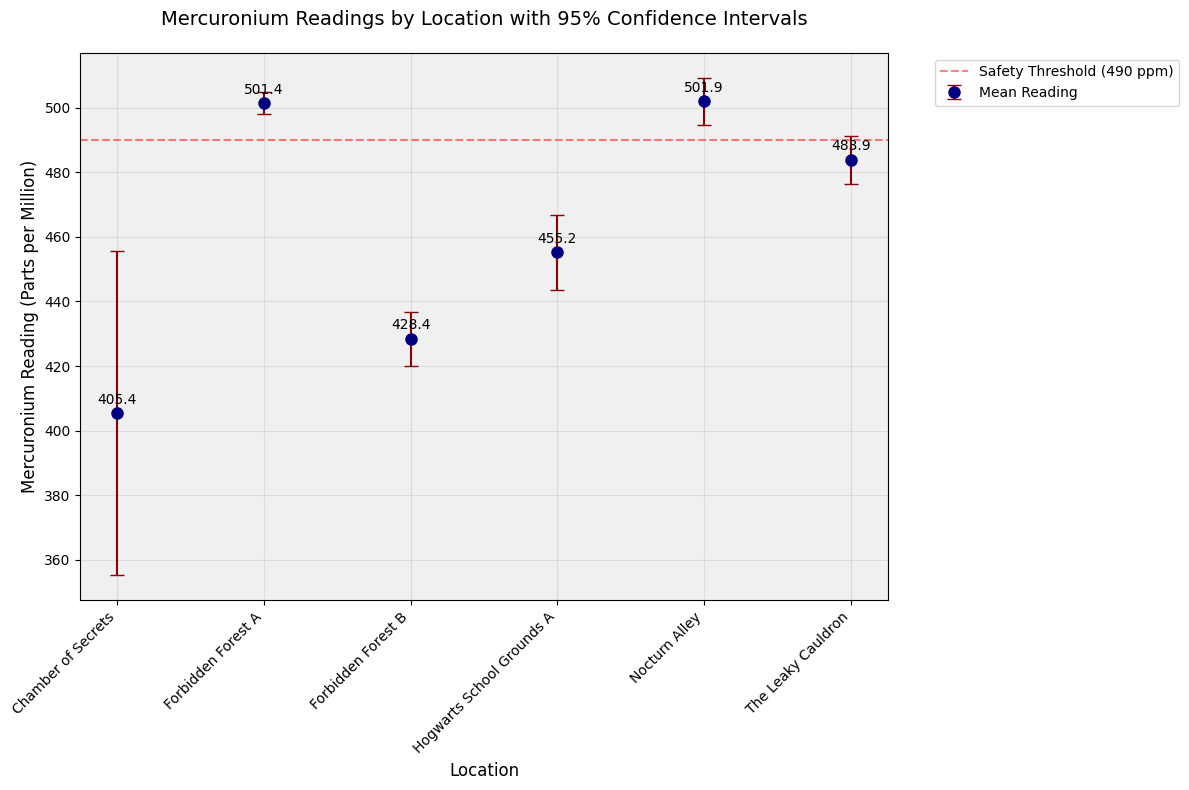

In [ ]:
import sys
!{sys.executable} -m pip install np
!{sys.executable} -m pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your Code Here

# Set style
fig, ax = plt.subplots(figsize=(12, 8))

# Plot points and error bars
locations = location_stats['Location']
means = location_stats['mean']
errors = [means - location_stats['reading_bottom_conf_inv'],
          location_stats['reading_top_conf_inv'] - means]

# Create scatter plot with error bars
ax.errorbar(locations, means, yerr=errors, fmt='o', 
            color='navy', ecolor='darkred', capsize=5,
            markersize=8, label='Mean Reading')

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
ax.set_facecolor('#f0f0f0')

# Add labels
plt.xlabel('Location', fontsize=12)
plt.ylabel('Mercuronium Reading (Parts per Million)', fontsize=12)
plt.title('Mercuronium Readings by Location with 95% Confidence Intervals', 
          fontsize=14, pad=20)

# Add value labels
for i, mean in enumerate(means):
    ax.text(i, mean + 2, f'{mean:.1f}', ha='center', va='bottom')

# Add reference line for safety threshold
plt.axhline(y=490, color='red', linestyle='--', alpha=0.5, 
            label='Safety Threshold (490 ppm)')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Problem 4:

If we want to make absolutely certain that the people of MagicLand are safe, which metric should we use to estimate the Mercuronium reading for the various locations? How would you describe what that metric means for the probability that the water is safe?

### YOUR ANSWER HERE

>

To ensure the safety of MagicLand’s residents, we should use the upper bound of the confidence interval (reading_top_conf_inv) as the evaluation metric. This value represents the worst-case scenario at a 95% confidence level, meaning the highest possible Mercuronium concentration. If the upper bound of the confidence interval is below the 490 ppm (parts per million) safety threshold, we can be 95% confident that the true Mercuronium level at that location is safe. If certain locations have upper confidence bounds significantly exceeding the safety threshold (504.86 and 509.28, respectively), it indicates that immediate attention and intervention are required in these areas.

### Problem 5:

Do you think Mercuronium poisoning is a continuous or a categorical variable? Why?

### YOUR ANSWER HERE

>

Based on the data, Mercuronium poisoning should be considered a continuous variable, for the following reasons:

1.The readings are numerical and measured in parts per million (ppm) – The values are not fixed categories but rather can take on any value within a range.
2.The data exhibits gradual changes rather than discrete jumps – The readings (e.g., 440.41, 523.50, 460.03, etc.) suggest a continuous spectrum of toxicity levels rather than distinct groups.
3.Potential health effects are dose-dependent – Different levels of Mercuronium may lead to varying degrees of toxicity, implying a progressive relationship rather than a simple "safe" or "toxic" categorization.

### Problem 6:

The bureau suspects that Mercuronium readings might be higher in the evenings than in the mornings. Test their hypothesis. You can use the T-test code provided below.

In [ ]:
def t_test_for(num_samples_1, standard_deviation_1, mean_1, num_samples_2, standard_deviation_2, mean_2, confidence=0.95):
    alpha = 1 - confidence
    total_degrees_freedom = num_samples_1 + num_samples_2 - 2

    t_distribution_number =-1 * t.ppf(alpha, total_degrees_freedom)

    degrees_freedom_1 = num_samples_1 - 1
    degrees_freedom_2 = num_samples_2 - 1
    sum_of_squares_1 = (standard_deviation_1 ** 2) * degrees_freedom_1
    sum_of_squares_2 = (standard_deviation_2 ** 2) * degrees_freedom_2

    combined_variance = (sum_of_squares_1 + sum_of_squares_2) / (degrees_freedom_1 + degrees_freedom_2)
    first_dividend_addend = combined_variance/float(num_samples_1)
    second_dividend_addend = combined_variance/float(num_samples_2)

    denominator = math.sqrt(first_dividend_addend + second_dividend_addend)
    numerator = mean_1 - mean_2
    t_value = float(numerator)/float(denominator)

    accept_null_hypothesis = abs(t_value) < abs(t_distribution_number) #results are not significant

    return accept_null_hypothesis, t_value

In [ ]:
# YOUR CODE HERE

# Calculate statistics for morning vs evening readings
morning_data = df[df['Time of Day'].str.lower() == 'morning']['Reading (Parts per Million)']
evening_data = df[df['Time of Day'].str.lower() == 'evening']['Reading (Parts per Million)']

morning_stats = {
    'n': len(morning_data),
    'mean': morning_data.mean(),
    'std': morning_data.std()
}

evening_stats = {
    'n': len(evening_data),
    'mean': evening_data.mean(),
    'std': evening_data.std()
}

print("Morning Statistics:")
print(f"Number of readings: {morning_stats['n']}")
print(f"Mean: {morning_stats['mean']:.2f}")
print(f"Standard Deviation: {morning_stats['std']:.2f}\n")

print("Evening Statistics:")
print(f"Number of readings: {evening_stats['n']}")
print(f"Mean: {evening_stats['mean']:.2f}")
print(f"Standard Deviation: {evening_stats['std']:.2f}\n")

# Perform t-test
accept_null, t_value = t_test_for(
    morning_stats['n'], morning_stats['std'], morning_stats['mean'],
    evening_stats['n'], evening_stats['std'], evening_stats['mean']
)

print(f"T-test results:")
print(f"T-value: {t_value:.2f}")
print(f"Null hypothesis accepted: {accept_null}")

Morning Statistics:
Number of readings: 335
Mean: 464.64
Standard Deviation: 56.50

Evening Statistics:
Number of readings: 306
Mean: 470.96
Standard Deviation: 54.17

T-test results:
T-value: -1.44
Null hypothesis accepted: True


### Problem 7:

Would you say that readings are appreciably higher in the evenings than in the mornings? Why or why not?

### YOUR ANSWER HERE

>

Although the evening readings are slightly higher than the morning readings, the t-test results indicate that this difference is not statistically significant. Since the small difference in means is likely due to random variation, we cannot conclude that time of day has a significant impact on Mercuronium levels. Therefore, at present, this difference is not sufficient to suggest a clear pattern.


### Problem 8:

Disappointed with this finding, the bureau notes that we also have data on which assessor did each reading. They now want you to go back and see if you can find a connection between the assessors and the ratings—maybe someone is assessing too harshly? 

How would you caution them about this decision?

### YOUR ANSWER HERE

>

When investigating the relationship between assessors and measurement results, consider the following points:

1.Measurement Error vs. True Trend
An assessor’s measurements may have personal bias, but this does not necessarily mean someone is being "too strict" in their assessments.

2.Statistical Significance vs. Misleading Conclusions
Even if different assessors have varying average readings, is this difference statistically significant,Proper statistical analysis is needed to confirm any differences, rather than relying solely on intuition or surface-level patterns in the data.
3.Assessor Experience and Methods
More experienced assessors may apply stricter standards, leading to higher readings, but this does not necessarily mean their assessments are unreasonable.Assessors may have different measurement habits or techniques, so ensuring standardized measurement procedures and equipment is essential.
4.Avoiding Attribution Error
Higher readings from certain assessors should not automatically lead to the assumption that they are exaggerating contamination levels.Possible explanations include uneven pollutant distribution across locations or the fact that some assessors more frequently sample heavily contaminated areas.